# Computational Methods in Economics

## Tutorial 2c - NumPy and Matplotlib

In [1]:
# Author: Alex Schmitt (schmitt@ifo.de)

import datetime
print('Last update: ' + str(datetime.datetime.today()))

Last update: 2019-11-07 17:48:51.491185


## This Lecture

- [NumPy](#num)
- [Vectorized Operations](#vec)
- [Two-Dimensional Arrays](#two)
- [Multi-Dimensional Arrays](#multi)
- [Matplotlib](#mat)

----------------------------------------------------------------------------------------------------------------------
<a id = "num"></a>

## NumPy

NumPy is probably the most widely used library for numerical programming and scientific computing in Python. Its documentation can be found here:

http://docs.scipy.org/doc/numpy/reference/

Many people in the community will usually import it with an abbreviated name, using **import** with the **as** keyword. 

In [2]:
import numpy as np

### Motivation

Suppose we would like to implement the popular Cobb-Douglas production function $y = f(E, L) = E^\alpha L^{1 - \alpha}$ as a Python function. Based on what we have learnt so far, this is straight forward:

In [3]:
def cobb_douglas(E, L, alpha = 0.5):
    """
    Implements the Cobb-Douglas production function: y = E**alpha * L**alpha
    """
    y = E**alpha * L**(1 - alpha)
    return y

print(cobb_douglas(10, 1))

3.1622776601683795


Note that the function allows $E$ and $L$ to be scalar numbers. It would be nice to also be able to use the function on *arrays* (or *vectors*). For example, we may be interested in evaluating different combinations of $E$ and $L$ simultaneously, say $(E, L) = (10,1)$, $(E, L) = (12, 0.5)$ and $(E, L) = (15, 0.33)$. 

One way you may think of in order to accomplish this in Python is using a loop together with the **zip** function.

In [4]:
input_E = [10,12,15]
input_L = [1,0.5,0.33]
for item_E, item_L in zip(input_E, input_L):
    print(cobb_douglas(item_E, item_L))

3.1622776601683795
2.4494897427831783
2.224859546128699


This works fine, but is not the most efficient solution. In particular, for large inputs, loops can take quite some time to execute. What would preferable instead is if we could insert lists of numbers (instead of scalars) in the function. 

The technical term of doing this is to perform *vectorized operations* on the input arrays. While this is a great idea, unfortunately it won't work with lists:

In [5]:
# print(cobb_douglas([10, 12, 15], [1, 0.5, 0.33])) # this will throw an error!

It will work with a different type of array, namely a NumPy array.

### NumPy Arrays

NumPy introduces a new type of array: *numpy.ndarray* (n-dimensional array). A one-dimensional NumPy array shares some features with a Python list: it contains a sequence of elements, which can be of any type (e.g. integers or strings). 

The elements are ordered and you can access them by position, using the slicing notation introduced above (with the first element indexed by 0 etc.). You can also use NumPy arrays in for-loops, iterating over its elements. 


In fact, one way to get a NumPy array is to take a list and convert it using the **np.array** function.

In [6]:
names = ['Daenerys', 'Tyrion', 'Arya', 'Samwell']  # start with a list, here of strings

names_np = np.array(names)  # define a NP array
print(names_np)
print(type(names_np))

['Daenerys' 'Tyrion' 'Arya' 'Samwell']
<class 'numpy.ndarray'>


In [7]:
print(names_np[0])    # access first element
print(names_np[1:3])  # access second and third element

for item in names_np: # loop over elements
    print(item)

Daenerys
['Tyrion' 'Arya']
Daenerys
Tyrion
Arya
Samwell


#### Copying Arrays

Just as lists, NumPy arrays are mutable, i.e. can be changed. Note that this brings about the same issue as with lists if two names refer to the same array: then changing one of them will change the other as well. One option to make a copy of an array is the function **np.copy**, which will make a shallow copy of a NP array. 

As this topic is quite important when working with lists and arrays, we present some extension to copying of lists (and NP arrays) at the end of this notebook. For NP arrays and in the next paragraphs, we will use the method **copy**. Here are some examples to understand the difference between a copy and the defintion of a different name.

In [8]:
names = ['Daenerys', 'Tyrion', 'Arya', 'Samwell']  
names_np = np.array(names)  # create NP array

## define a different name that refers to the same array
heroes_np = names_np
## change array names
names_np[0] = 'Cersei'
## print array heroes
print(names_np)
print(heroes_np)

['Cersei' 'Tyrion' 'Arya' 'Samwell']
['Cersei' 'Tyrion' 'Arya' 'Samwell']


In [9]:
names_np = np.array(names)  # create NP array

# Solution (if necessary)
heroes_np = names_np.copy()  # define heroes_np as a copy of names_np
names_np[0] = 'Cersei'
print(names_np)
print(heroes_np)

['Cersei' 'Tyrion' 'Arya' 'Samwell']
['Daenerys' 'Tyrion' 'Arya' 'Samwell']


----------------------------------------------------------------------------------------------------------------------
<a id = "vec"></a>

## Vectorized Operations

Despite their similarities, there are some key differences between lists and NumPy arrays. First, each element in a NP array must be of the *same type*, for example all elements must be strings or all integers. Second, NP arrays allow for *vectorized operations*. 

Essentially, *a vectorized operation applies a command to every element in an array*. 

Consider the basic arithmetic operations. Recall from above that using **"+"** on two lists would concatenate them, while a **"-"** operation is not defined on lists.    

With NP arrays, in contrast, addition of two arrays of the same length works as a vectorized operation, adding up the elements by position (*elementwise addition*). An analogous operation is performed in the case of subtraction, multiplication and division. Finally, *scalar multiplication* multiplies each element of the NP array with an integer or a float. 

In [10]:
ls = [1, 2, 3, 4]   # list

A = np.array(ls) # turn list NP into array
B = 5 * A   # scalar multiplication using NP arrays

print('A = ', A)
# print (ls*5) # Compare with list
print('B = ', B)

A =  [1 2 3 4]
B =  [ 5 10 15 20]


In [11]:
print('B + A = ', B + A)  # elementwise addition 
print('B - A = ', B - A)  # elementwise subtraction 
print('B * A = ', B * A)  # elementwise multiplication 
print('B / A = ', B / A)  # elementwise subtraction 

B + A =  [ 6 12 18 24]
B - A =  [ 4  8 12 16]
B * A =  [ 5 20 45 80]
B / A =  [5. 5. 5. 5.]


### Universal Functions

In addition to the basic arithmetic operations, *vectorized functions* (also called "universal functions" or *ufuncs*, since they accept both numbers and sequences as arguments) are another example of vectorized operations.

Important examples are **np.log** and **np.exp**, which apply the natural logarithm and the exponential function, respectively, elementwise on a sequence. 

Note that NumPy's vectorized function accept not only NP arrays as arguments, but all types of ordered arrays like lists and tuples. However, the returned object will always be a NP array. 

In [12]:
print(ls)
print(np.log(ls))        # use np.log on a list
print(type(np.log(ls)))  # argument: list -> returns a NP array

print(type(np.log(A)))   # argument: NP array -> returns a NP array

[1, 2, 3, 4]
[0.         0.69314718 1.09861229 1.38629436]
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


### Statistical Functions and Methods

In addition, there are a number of useful functions that operate on the whole array and return some statistic, for example the mean, standard deviation, maximum/minimum value or the sum. Again, you can apply these functions to any array.

In [13]:
print(np.mean(ls))       # use np.mean() on a list to get the mean

print(np.mean(A))        # use np.mean() on NP array to get the mean
print(np.std(A))        # standard deviation
print(np.max(A))        # maximum value

2.5
2.5
1.118033988749895
4


In the case of NumPy arrays, these functions can be used as methods (which is the more common way to use them):

In [14]:
# use methods instead
print(A.mean())   # use .mean() method
print(A.std())    # use .std() method
print(A.max())    # use .max() method
print(A.min())    # use .min() method
print(A.sum())    # use .sum() method

2.5
1.118033988749895
4
1
10


In [15]:
# other useful methods
print(A.cumsum()) # cumulative sum
print(A.cumprod()) # cumulative product

[ 1  3  6 10]
[ 1  2  6 24]


In [16]:
# finding the position of the minimum and maximum
print(A)
print(A.argmax())    # use .argmax() method
print(A.argmin())    # use .argmin() method
# replacing the minimum
A[A.argmin()] = A.sum()
print(A)

[1 2 3 4]
3
0
[10  2  3  4]


### Why use NumPy and Vectorized Operations

The ability to use vectorized operations and fast array processing is the very point of NumPy. While you can perform some vectorized operations on Python lists, you should always use NumPy arrays instead, in particular for large arrays of integers or floats. 

In other words, when working with a lot of data stored in arrays, using a NumPy array will be significantly faster than using a Python list. 

There are some technical reasons for this, which you can read up on in the Quant-Econ section on Numpy (or in other sources). 

Moreover, you should *use vectorized operations whenever possible*, rather than use loops in Vanilla Python. Not only does this make your code more concise and hence improves readability, it can also make your code run faster considerably. 

In other words, vectorized operations speed up programming, both in terms of time it takes to run code and time it takes to write it.

As a side note: the time it takes to complete a programming project is the *sum of the time spent writing the code and the time that the computer spends running it*. Good programming should always strive to *minimize* this sum.

#### Vectorized Operations: Example

Suppose you want to create an array of a large number (say $N = 10,000,000$) of random draws from a uniform distribution and then compute the mean. Without using NumPy, your first crack at the problem may be to write a for-loop that starts with an empty list and in every iteration, performs a random draw and adds it to the list. This idea is implemented in the function **draw_unif**. 

Note that in Vanilla Python, the function **random()** in the module **random** implements a single draw from a uniform distribution.

In [17]:
import random

def draw_unif(N):
    ls = []
    for i in range(N):
        ls.append(random.random())
    return ls    
    
N = int(1e+7)  # alternative way to write N = 10000000

In addition, I implement the same function, but instead of an empty list, I initialize the loop with an empty NP array of length N. The advantage of this is that the computer knows in advance how large the array will be that the function returns. Note that in this case, the function **draw_unif_np** returns a NumPy array. 

In [18]:
def draw_unif_np(N):
    npa = np.zeros(N)
    for i in range(N):
        npa[i] = random.random()
    return npa 

I can "time" the time it takes to run these functions by using what is called an *IPython magic*, basically useful commands you can use in the IPython shell or a Jupyter notebook. Here, I add the command **%time** before running the function.

In [19]:
%time np.mean(draw_unif(N))  

CPU times: user 2.98 s, sys: 342 ms, total: 3.32 s
Wall time: 3.44 s


0.500047223536049

The user CPU time and system CPU time are the amount of time spent in user space and the amount of time spent in kernel space (see https://en.wikipedia.org/wiki/User_space if you are interested in that). The wall time is the elapsed time, including time spent waiting for its turn on the CPU. If you are running other programs at the same time, wall time might be higher than CPU time. On the other hand, if you are executing code in parallel mode (computing on several CPUs at the same time), the wall time could be smaller than the CPU time.

Timing the two functions shows that the implementation with a NumPy array is a bit faster than the one using a list. 

In [20]:
%time draw_unif_np(N).mean()

CPU times: user 3.34 s, sys: 131 ms, total: 3.47 s
Wall time: 4.61 s


0.5000945826271765

Next, I use what is called a *list comprehension*, which is a more efficient one-line implementation of the **draw_unif** function. As we can see, this is even slightly faster than the standard loop with a NumPy array:

In [21]:
%time np.mean([random.random() for i in range(N)]) 

CPU times: user 3.73 s, sys: 914 ms, total: 4.65 s
Wall time: 10.2 s


0.5000727290675305

Finally, I use a fully vectorized operation in NumPy. Its subpackage **random** (which is a different module than Vanilla Python's module of the same name) contains a vectorized function **uniform(a, b, N)** that performs N random draws from the interval $[a,b]$. This implementation performs the same task in *less than 1/10* of the time that it takes Vanilla Python.

In [22]:
%time np.random.uniform(0, 1, N).mean()

CPU times: user 278 ms, sys: 59.9 ms, total: 338 ms
Wall time: 615 ms


0.49997710281370245

----------------------------------------------------------------------------------------------------------------------

### Exercise 1

(a) Create random vector with five elements and print the average of the vector. Then, replace the maximum value by 0 and print the vector and its average again.

(b) Use NumPy's **random** package to get N draws from a standard normal distribution (google to get the name of the corresponding function and its syntax!) and store them in a NumPy array. Find the sample average and standard deviation for **N = 10**, **N = 1000** and **N = 1000000**.

----------------------------------------------------------------------------------------------------------------------
<a id = "two"></a>

## Two-dimensional Arrays

Another big advantage of NumPy compared to standard Python arrays is working in two dimensions, i.e. with matrices. 

While you can represent a matrix as a list of lists in Vanilla Python, 2D NumPy arrays are not only more memory efficient, but also more convenient to work with and have a lot of useful functions and methods, in particular when doing Linear Algebra.

There are different ways to create a 2D NumPy array. One is, similar to above, using the **np.array()** function on a list of lists. Alternatively, you can write all elements in a simple list, apply **np.array()** and then use the **shape** attribute to give the array the desired *dimension*.

In [23]:
# create 2-by-2 array from list of lists
ls = [[1,2],[3,4]]
A = np.array(ls)
print(A)

[[1 2]
 [3 4]]


In [24]:
# create 2-by-2 array from list and using shape 
B = np.array([1,2,3,4])
B.shape = (2,2)
print(B)

print(B.shape)  # print shape of B

[[1 2]
 [3 4]]
(2, 2)


**shape** takes a tuple with two elements: the first one represents the number of rows in the array, the second the number of columns. Of course, you have to make sure that the number of elements in the original list ([1,2,3,4]) equals the number of elements implied by the given dimension, here 2x2 = 4 - otherwise you will get an error. 

Moreover, note how NumPy applies the shape: it fills the 2D array row by row (rather than column by column).

You can also use the **shape** attribute to access an array's dimension. Note that a one-dimensional array, as defined above is by default *flat*: its dimension is *not*, for example, 4-by-1 (column vector) or 1-by-4 (row vector), but instead given as (4,). 

In order to change its dimension to (4,1) or (1,4) - and thus turn it into a *two-dimensional* array - you can use the **shape** attribute. 

In [25]:
A = np.array([1,2,3,4])
print('A flat 1D array', A, 'with dimension', A.shape)

A flat 1D array [1 2 3 4] with dimension (4,)


In [26]:
# turn A into a 4-by-1 column vector
A.shape = (4,1)
print('A column vector', A, 'with dimension', A.shape)

A column vector [[1]
 [2]
 [3]
 [4]] with dimension (4, 1)


In [27]:
# turn A into a 4-by-1 column vector
A.shape = (1,4)
print('A row vector', A, 'with dimension', A.shape)

A row vector [[1 2 3 4]] with dimension (1, 4)


### Special Arrays

There are other ways to create particular NumPy arrays. The functions **np.zeros** and **np.ones** create arrays filled with zeros and ones, respectively, where the input argument determines the number of elements. 

You can make them two-dimensional arrays right away by giving them the intended dimension, again as a tuple. 

In [28]:
Z = np.zeros(3)
print('A flat 1D array', Z, 'with dimension', Z.shape)

O = np.ones((2,2))
print('A 2D array', O, 'with dimension', O.shape)

A flat 1D array [0. 0. 0.] with dimension (3,)
A 2D array [[1. 1.]
 [1. 1.]] with dimension (2, 2)


The functions **np.eye** and **np.identity** create the identity matrix. Since this is by default a two-dimesional *square* matrix (number of rows = number of columns), it takes only one integer as an argument. 

**np.linspace(x, y, N)** is very useful for setting up a 1D array of N evenly spaced numbers between x and y.

In [29]:
I = np.eye(2)
print('The identity matrix', I, 'with dimension', I.shape)

G = np.linspace(1, 3, 5)
print('A flat 1D array', G, 'with dimension', G.shape)

The identity matrix [[1. 0.]
 [0. 1.]] with dimension (2, 2)
A flat 1D array [1.  1.5 2.  2.5 3. ] with dimension (5,)


### Indexing and Slicing

As mentioned above, for a flat array, indexing is the same as standard Python sequences. For 2D arrays, the notation is similar, but using two indices, one for rows and one for columns. In other words, the slicing notation introduced for arrays is generalized in order to access multiple elements.

For example, **A[0, 1]** accesses the element in array A which is in the *first row* (indices start at 0!) and *second column*. 

In [30]:
A = np.array([[1,2,3], [4,5,6], [7,8,9]])  # create 2D array with dimension 3-by-3

print(A[0, 1])    # print element in first row, second column
print(A[-1, -1])  # print element in last row, last column

2
9


In [31]:
print(A[:,1])     # print second column; NB: resulting array is flat!
print(A[2,:])     # print third row; NB: resulting array is flat!
print(A[:2,:2])   # print elements in first two rows and first two columns

[2 5 8]
[7 8 9]
[[1 2]
 [4 5]]


2D NumPy arrays can use the same methods as flat arrays. For example, using the **.mean()** method without an argument gives you the mean value across *all* elements in an array. 

In addition, you can also compute the mean for each column or each row separately, using **axis = 0** (across rows) and **axis = 1** (across columns). 

In [32]:
print(A)
print(A.mean())         # mean across all elements
print(A.mean(axis = 0)) # mean for each column, across rows
print(A.mean(axis = 1)) # mean for each row, across columns

[[1 2 3]
 [4 5 6]
 [7 8 9]]
5.0
[4. 5. 6.]
[2. 5. 8.]


### Vectorized Operations

Vectorized operations work in the same way as they do for flat arrays. Vectorized functions such as **np.log** are applied to each element in the 2D array, while operations such as addition work elementwise; of course that implies that the two arrays you add must have the same dimension. 

In [33]:
A = np.array([[1,2,3], [4,5,6], [7,8,9]])  # create 2D array with dimension 3-by-3
B = np.ones((3,3))

print(np.log(A))    # apply vectorized function

[[0.         0.69314718 1.09861229]
 [1.38629436 1.60943791 1.79175947]
 [1.94591015 2.07944154 2.19722458]]


Caution: **A * B** performs elementwise multiplication, *not matrix multiplication*. Adding a scalar to a 2D array or multiplying a 2D array with a scalar works as expected. Finally, note that *comparisons* (e.g. A > 2 or A > B) are also done elementwise, resulting in a 2D arrays of Booleans with the same dimension as A.

In [34]:
print(A + B)        # elementwise addition        
print(A * B)        # elementwise multiplication

[[ 2.  3.  4.]
 [ 5.  6.  7.]
 [ 8.  9. 10.]]
[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]


In [35]:
print(A + 4)        # adding a scalar
print(A * 2)        # multiplying with a scalar

[[ 5  6  7]
 [ 8  9 10]
 [11 12 13]]
[[ 2  4  6]
 [ 8 10 12]
 [14 16 18]]


In [36]:
print(A > 2)        # elementwise comparison to a scalar
print(A > 3 * B)    # elementwise comparison between two arrays

[[False False  True]
 [ True  True  True]
 [ True  True  True]]
[[False False False]
 [ True  True  True]
 [ True  True  True]]


### Index Arrays

Note that the last example gives rise to NumPy *index arrays*. As an example, say you want to find all elements in a 1D or 2D array that are greater than 2. A straightforward way would be to use a loop, i.e. go through all elements in the array and check each of them successively, storing the ones that satisfy the condition. 

However, there is a *vectorized* and hence much faster option. The key idea is that you can use NumPy arrays that consists of booleans as index arrays for other arrays, assuming they have the same dimension.

In [37]:
Q = np.array([1, 2, 3])
P = np.array([True, True, False])
print(Q[P])

[1 2]


Basically, you keep only the elements of Q that correspond to a **True** Boolean in P. Using this idea, we can define B as **B = A > 2** and then use **A[B]** in order to get all elements of A greater than 2. In fact, we do not even have to define B, but can access these elements direcly: 

In [38]:
print(A[A > 2])

[3 4 5 6 7 8 9]


In the same way, we can also change single values of the array depending on one or multiple conditions:

In [39]:
B = A.copy()
B[B > 5] = 0
print(B)

[[1 2 3]
 [4 5 0]
 [0 0 0]]


It is also possible to have multiple conditions with the & (and) or the | (or) operators.

In [40]:
B[(B > 2) & (B < 5)] = 0
# alternative 
# B[np.logical_and(B > 2, B < 5)] = 0 
print(B)

[[1 2 0]
 [0 5 0]
 [0 0 0]]


In [41]:
C = A.copy()
C[(C > 2) & (C < 5)] = C[(C > 2) & (C < 5)]**2
# alternatively: 
# C[(C > 2) & (C < 5)] **=2
print(C)

[[ 1  2  9]
 [16  5  6]
 [ 7  8  9]]


In [42]:
C = A.copy()
C[(C > 5) | (C < 3)] = C[(C > 5) | (C < 3)]**2
# alternatively: 
# C[(C > 2) | (C < 5)] **=2
print(C)

[[ 1  4  3]
 [ 4  5 36]
 [49 64 81]]


It might also be useful to see where the elements that satisfy one or more conditions are located in an array. The function **np.where()** returns a tuples that contains a list of the row indices and a list of the column indices of those elements that satisfy the conditions.

In [43]:
print(np.where(A > 2))
rows, columns = np.where(A > 2)

## use zip function to get index pairs
for idxr, idxc in zip(rows, columns):
    print(A[idxr, idxc])

(array([0, 1, 1, 1, 2, 2, 2]), array([2, 0, 1, 2, 0, 1, 2]))
3
4
5
6
7
8
9


----------------------------------------------------------------------------------------------------------------------

### Exercise 2

(a) For the last case in exercise 1(b) with **N = 1000000**, use an index array or Numpy's **where** function to find the share of draws that is either less than -1.96 or greater than 1.96. What's your expectation what this share should be?

(b) Create a two-dimensional 4-by-4 NumPy array **Ar** with elements from 1 to 16. A quick way to do is using Python **range** function and the **shape** method of NP arrays. Recall from linear algebra that multiplying any matrix with the identity matrix **Id** just results in same matrix (i.e. $I \cdot Ar = Ar \cdot I = Ar$). Confirm this using your array **Ar**. What happens if you multiply **Ar** with an array of the same dimension that consists only of 1s?

(c) Write a function **get_diag** that takes a *square* matrix of dimension **nn** and returns a flat array of length **nn** that contains the elements on the matrix' diagonal. The first thing the function should do is checking if the input is a square array and give an error message otherwise. You could this in many ways; one neat option is an **assert** statement (check the documentation!). Alternatively, you could use a print statement and interrupt the function with **Return None**.

----------------------------------------------------------------------------------------------------------------------

### Matrix Multiplication

*Matrix multiplication* is an important operation in the context of linear algebra. For Python 3.5 and above, you can use the **'@'** symbol for matrix multiplication. In ealier version, you have to use **np.dot(A, B)**.

The usual requirement for matrix multiplications apply. In particular, the number of columns of the first array must be equal to the number of row in the second array. 

In [44]:
A = np.array([[1,2], [4,5], [7,8]])  # create 2D array with dimension 3-by-2
B = np.ones((2,4))

print(A @ B)

[[ 3.  3.  3.  3.]
 [ 9.  9.  9.  9.]
 [15. 15. 15. 15.]]


For flat arrays, matrix multiplication gives the inner product: 

In [45]:
A = np.array([1,2,3,4])
B = np.array([1,1,1,1])
print(A @ B)
print(B @ A)


10
10


----------------------------------------------------------------------------------------------------------------------
<a id = "multi"></a>

## Multidimensional Arrays

As the name of ndarray stems from n-dimensional array, it's useful to point to the fact that NP arrays are not restricted to 2 dimensions. I will not go into details here but just have a look at basic properties. 

One option to generate a 3-D array is to stack two 2-D arrays with the function **np.stack**. The argument *axis* is optional and give the direction (in the 3-D Array), in which the input arrays are stacked.

In [46]:
A = np.array([[1,2,3], [4,5,6], [7,8,9]])  # create 2D array with dimension 3-by-3
B = np.ones((3,3))

S = np.stack((A, B), axis = 0)
print(S)
print(S.shape)

[[[1. 2. 3.]
  [4. 5. 6.]
  [7. 8. 9.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]]
(2, 3, 3)


Multidimensional arrays can also be also be constructed by **np.ones** or **np.zeros** and can have more than 3 dimensions as well.

In [47]:
# 4-dimensional array filled with ones and two elements in each dimension
Om = np.ones((2,2,2,2))
print(Om)

[[[[1. 1.]
   [1. 1.]]

  [[1. 1.]
   [1. 1.]]]


 [[[1. 1.]
   [1. 1.]]

  [[1. 1.]
   [1. 1.]]]]


In [48]:
# 4-dimensional array of zeros, diffent number of elements in the dimensions
Zm = np.zeros((2,2,3,4))
print(Zm)

[[[[0. 0. 0. 0.]
   [0. 0. 0. 0.]
   [0. 0. 0. 0.]]

  [[0. 0. 0. 0.]
   [0. 0. 0. 0.]
   [0. 0. 0. 0.]]]


 [[[0. 0. 0. 0.]
   [0. 0. 0. 0.]
   [0. 0. 0. 0.]]

  [[0. 0. 0. 0.]
   [0. 0. 0. 0.]
   [0. 0. 0. 0.]]]]


The elements of the array can be accessed by a vector with the position in each dimension, e.g [1,3,2] accesses the element at the second position in the first dimension, the fourth position in the second dimensions and the third position in the third dimension.

In [49]:
Zm[0,1,0,0] = 1
print(Zm)
#Zm[0,:,:,:] = 1
#print(Zm)

[[[[0. 0. 0. 0.]
   [0. 0. 0. 0.]
   [0. 0. 0. 0.]]

  [[1. 0. 0. 0.]
   [0. 0. 0. 0.]
   [0. 0. 0. 0.]]]


 [[[0. 0. 0. 0.]
   [0. 0. 0. 0.]
   [0. 0. 0. 0.]]

  [[0. 0. 0. 0.]
   [0. 0. 0. 0.]
   [0. 0. 0. 0.]]]]


----------------------------------------------------------------------------------------------------------------------
<a id = "stock"></a>

## Taking Stock

Recall from above that we have defined a Cobb-Douglas production function that can take scalars (integer or floats) as arguments. For convenience, it is defined again below. We also noted that if we want to compute the output for several *(E,L)* combinations simultaneously, we need to use a loop since the function could not operate on Python lists. 

In fact, in terms of the terminology that we learnt in this section, what we want our **cobb_douglas** function to do is to be able to perform a vectorized operation on two arrays of inputs. It should not come as a surprise that the function does exactly that when we use NumPy arrays rather than lists as input arguments:

In [50]:
def cobb_douglas(E, L, alpha = 0.5):
    """
    Implements the Cobb-Douglas production function: y = E**alpha * L**alpha
    """
    y = E**alpha * L**(1 - alpha)
    return y

# run the function with NP arrays as inputs
print(cobb_douglas(np.array([10, 12, 15]), np.array([1, 0.5, 0.33]), 0.33)) 

[2.13796209 1.42705172 1.16282525]


----------------------------------------------------------------------------------------------------------------------
<a id = "mat"></a>

## Matplotlib

*Matplotlib* is an outstanding graphics library, designed for scientific computing, with high quality 2D and 3D plots
and output in all the usual formats (PDF, PNG, etc.). To import it, run the following code:

In [51]:
import matplotlib.pyplot as plt
%matplotlib inline

The second line imports Matplotlib's subpackage **pyplot**. The third line tells the Jupyter notebook to display figures not in separate windows, but as part of the output below the cell. This line is specific to using Matplotlib in a Jupyter notebook.

Before going into details, we should emphasize that the material presented here only scratches the very surface of creating plots and figures with Matplotlib. There is a lot of advanced functionality - you can compare compare the offical documentation, including the very illustrative Matplotlib gallery, for more examples.

http://matplotlib.org/1.5.1/index.html

http://matplotlib.org/gallery.html

### Line Plots

Matplotlib allows you to choose from a large number of different graph types, for example scatter plots, histograms, or pie charts. The easiest way to plot a data sequence **yy** over a data sequence **xx** is a simple line plot, using the the **plt.plot()** function.

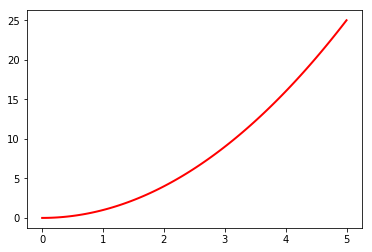

In [53]:
xx = np.linspace(0,5,100)
yy = xx**2
plt.plot(xx, yy, 'r-', linewidth=2)
# plt.show()

We can give additional *optional* arguments to the plot function, for example an argument for the color, here **-r** for red (the default is blue) and **linewidth=2** to draw the line a bit thicker than the default. 

Note that in other Python environments, the **plt.show()** statement may be necessary for displaying the figure. 

Instead of the simple syntax above, I would recommend to use the following code when implementing graphics, which defines a *Figure* and a an *AxesSubplot* object. 

**plot()** as well as other functions are then used as methods of **ax**. The main advantage of using this syntax is that you have much more ways (via methods) to customize your graph. For example, you can add labels, a title and a legend. 

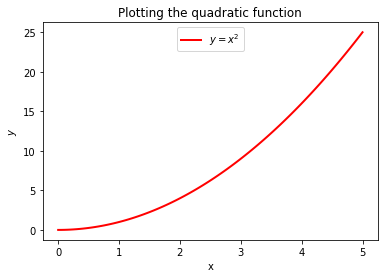

In [54]:
xx = np.linspace(0,5,100)
yy = xx**2
fig, ax = plt.subplots()
ax.plot(xx, yy, 'r-', linewidth=2, label = '$y = x^2$')
ax.set_title('Plotting the quadratic function')
ax.set_xlabel('x')
ax.set_ylabel('$y$')
ax.legend(loc = 'upper center')

Note that each of the strings can be combined with LaTeX syntax to implement mathematical expression. What is shown in the legend field is determined by the *label* argument of the plot method. Its position can be set with the *loc* argument.

You can also combine multiple plots in one figure.

In [55]:
x = np.linspace(0,5,100)
y = np.sin(x)
z = np.cos(x)

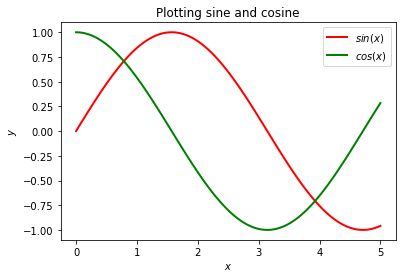

In [56]:
fig, ax = plt.subplots()
ax.plot(x, y, 'r-', linewidth=2, label = '$sin(x)$')
ax.plot(x, z, 'g-', linewidth=2, label = '$cos(x)$')
ax.set_title('Plotting sine and cosine')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.legend(loc = 'upper right')

An another example, consider the Cobb-Douglas production defined above. As an illustration, we plot output levels against input quantities for one of the production factors (keeping the other one fixed). Since labor supply is constrained by 1, it makes sense to fix it at this level, and plot $y$ against $E$, say over a grid between 0 and 10 (these values are rather arbitrary). 

We can use NumPy **linspace** function and compute the output value for 100 grid points. Given this grid, we let Python compute and draw two output plots, one for $\alpha = 0.5$ (the default value) and one for $\alpha = 0.33$ - recall that $\alpha$ denotes the exponent in the Cobb-Douglas function, which equals the factor income share of $E$ in this example. 

As we would expect, the resulting plots are concave, and a higher $\alpha$ corresponds to a higher output level.

In [57]:
N = 100
## interpolate first production factor over equidistant grid
E = np.linspace(0, 10, N)

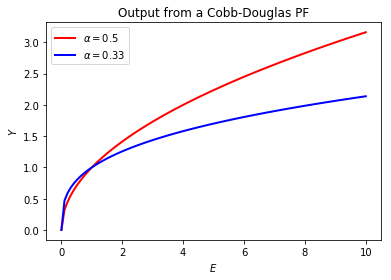

In [58]:
fig, ax = plt.subplots()
ax.plot(E, cobb_douglas(E, 1), 'r-', label = '$\\alpha = 0.5$', linewidth=2)
ax.plot(E, cobb_douglas(E, 1, 0.33), 'b-', label = '$\\alpha = 0.33$', linewidth=2)
ax.set_title('Output from a Cobb-Douglas PF')
ax.set_xlabel('$E$')
ax.set_ylabel('$Y$')
ax.legend(loc = 'upper left')

----------------------------------------------------------------------------------------------------------------------

### Exercise 3

(a) Draw the function $y=log(x)$ on the interval from 1 to 10

(b) Draw the function $y=x^3$ on the interval from -10 to 10. Compile the plot once with N=5 and with N=100 individual values for the x-axis, both in the same figure. Set two different colors for the to lines.


----------------------------------------------------------------------------------------------------------------------

### Contour Plots

Another way to plot three-dimensional data such as provided by the Cobb-Douglas function above are *contour plots*. They are a graphical representation of isoquants, which you may remember from elementary economics courses (e.g. indifference curves in utility theory or production isoquants). 

In the Cobb-Douglas examples, a line in a contour plot represents all possible (**E, L**) combinations that obtain a given output level. In Matplotlib, such a plot can be called by the **contour** method.

In [59]:
N = 11
## interpolate both production factors over equidistant grid
E = np.linspace(0, 10, N)
L = np.linspace(0, 1, N)
## use meshgrid function 
X, Y = np.meshgrid(E, L)
Z = cobb_douglas(X, Y)

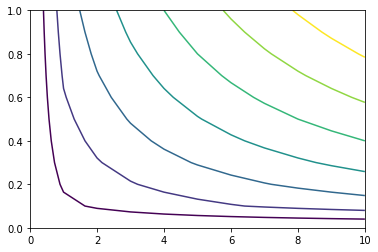

In [60]:
## plot contour
fig, ax = plt.subplots()
ax.contour(E, L, Z, cmap='viridis')

Note that each of the functional values **'Z'** above is the combination of of two inputs, one element of **'E'** and one element of **'L'**. In other words, if we have e.g. 10 values for both **'E'** and **'L'**, we have 100 function values. 

A quick way for both computing function values and plotting is Numpy's **meshgrid** function. It takes two one-dimensional arrays and "makes them two-dimensional", by stacking up either the same row or the same column vector. 

The resulting matrices can be used in the function to compute the two-dimensional functional values as a vectorized operation.

In [61]:
print(X)

[[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
 [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
 [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
 [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
 [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
 [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
 [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
 [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
 [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
 [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
 [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]]


In [62]:
print(Y)

[[0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2]
 [0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3]
 [0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4]
 [0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
 [0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6]
 [0.7 0.7 0.7 0.7 0.7 0.7 0.7 0.7 0.7 0.7 0.7]
 [0.8 0.8 0.8 0.8 0.8 0.8 0.8 0.8 0.8 0.8 0.8]
 [0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9]
 [1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1. ]]


Depending on the functional relationship you plot, a contour plot can look quite fancy. Consider the example below that plots the sine of the squared sum of two numbers.

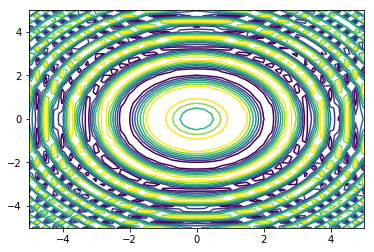

In [63]:
x = np.arange(-5.01, 5.01, 0.25)
y = np.arange(-5.01, 5.01, 0.25)
xx, yy = np.meshgrid(x, y)
zz = np.sin(xx**2+yy**2)

## plot contour
fig, ax = plt.subplots()
ax.contour(x, y, zz, cmap='viridis')

We get some insight why the contour plot looks like this if we fix the second argument and plot the relevant column of **zz** over **x**:

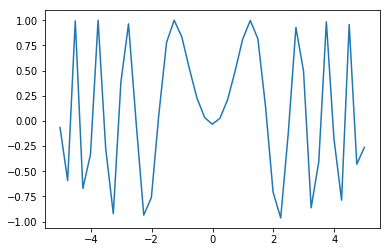

In [64]:
fig, ax = plt.subplots()
ax.plot(x, zz[0,:])

### Bar Plots

Bar plots are a way to illustrate frequencies in a data set. As a (non-economic) example, we have data on when in a game the clubs from the German Bundesliga scored their goals during the 2016/17 season. 

The "bins" for the minutes are the following: ['1 - 15', '16 - 30', '31 - 45', '45+', '46 - 60', '61 - 75', '76 - 90', '90+']. 

The data is stored in text file. We can use Numpy's very useful **loadtxt** function to directly load this (purely numerical) data into a Numpy array.

In [65]:
## load data from txt-file
D = np.loadtxt('Data/goal_dis.txt')
print(D.shape)

(18, 8)


As a side note, a better way to store this data would be in a *Pandas dataframe* - we'll get to that in the next lecture. 

The resulting Numpy array has 18 rows (one for each club) and 8 columns (one for each bin). To get the total number of goals for each bin, we sum across the rows. We can then generate a bar plot using the **bar** method. The height of each bar indicates how many observations (goals) are in the corresponding bin.

In [66]:
## bins
labels = ['1 - 15', '16 - 30', '31 - 45', '45+', '46 - 60', '61 - 75', '76 - 90', '90+']

## sum across the rows
tot = D.sum(axis = 0)

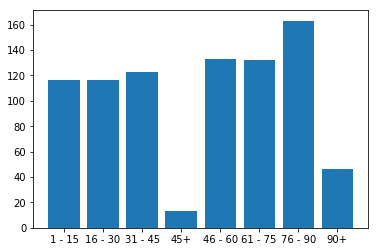

In [67]:
fig, ax = plt.subplots()
ax.bar(range(8), height = tot)
ax.set_xticks( np.array(range(0,8)) )
ax.set_xticklabels(np.array(labels))
plt.show()

This example also illustrates other useful methods to use when plotting **set_xticks** and **set_xticklabels**. They allow you to customize the labeling on the axes of your graph.

### Histograms

Histograms are a particular type of bar chart and a common type of graph in statistics. As an example, below we sample 50000 draws from a normal distribution using Scipy's **stats** package (more on this in the next lecture!). 

We then plot the sampling distribution in a histogram with 30 bins using the **hist** method. Just for illustration, we also plot the pdf of the normal distribution. Feel free to look up the documentation of **hist** and play around with the settings, in particular the number of bins.

In [68]:
from scipy.stats import norm
## Parameters of the normal distribution
mu = 2
sigma = 3
## Sampling for sample size N
N = 50000
r = norm.rvs(mu, sigma, size = N)

Text(0,0.5,'$p(x)$')

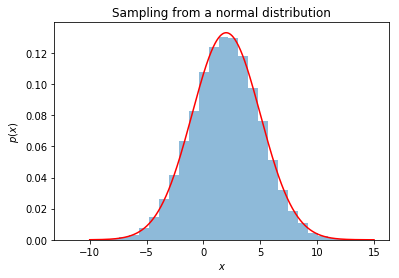

In [69]:
## Plotting
fig, ax = plt.subplots()
## Histogram for sample
ax.hist(r, 30, density=True, histtype='stepfilled', alpha=0.5)

## plot pdf
M = 1001
x = np.linspace(-10, 15, M)
ax.plot(x, norm.pdf(x, mu, sigma) , 'r') 

ax.set_title("Sampling from a normal distribution")
ax.set_xlabel("$x$")
ax.set_ylabel("$p(x)$")

### Scatter Plots
Scatter plots allow to show more than two dimensions. Basic scatter plots would display two variables on their x- and y-axis. In addition, the markers in the scatter plot can be colored or their size can be adjusted, or both. So, four different variables can be plotted and analyzed in one figure. 

We start with a plot of four variables (each of 100 random values) that are shown in one figure.

In [70]:
# example from http://nbviewer.jupyter.org/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/04.02-Simple-Scatter-Plots.ipynb
rng = np.random.RandomState(0)
x = rng.randn(100)
y = rng.randn(100)
colors = rng.rand(100)
sizes = 1000 * rng.rand(100)

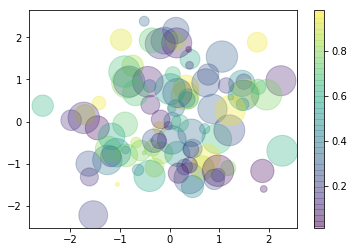

In [71]:
fig, ax = plt.subplots()
im = ax.scatter(x, y, c=colors, s=sizes, alpha=0.3, cmap='viridis')
fig.colorbar(im);  # show color scale

As another example, we have compiled a dataset on football players of the German bundesliga. The dataset contains the names, the market value and several statistics of the season 2016/2017 (e.g. number of goals, success rate of passes etc). 

You received the dataset in the "bundesliga.txt" file in the "data" folder. The datasource is "www.transfermarkt.de" and "www.whoscored.com"  In this lecture we are working with Numpy only, which does not allow to have arrays consisting of strings and numerical values. What we learn here might does seem a bit inelegant, however, with the introduction of the Pandas package in the next lecture, working with such dataset will become easier.

With the **np.loadtxt** function, we can decide which columns we want to include in the analysis. Remember: only columns containing the same data type can be loaded! Here, we include the columns for market value (column 2), pass success (column 10), aerials won (column 11) and position (column 13).

In [72]:
cols=(2,10,11,13)
# load data from txt-file
bundesliga = np.loadtxt('Data/BundesligaData.txt', delimiter=';',usecols=(cols), skiprows=1)

Next, we visualize the data. For this example, we plot the pass success on the x-axis, the aerials won per game on the y-axis, and color the markers according to their position (with **cmap = 'varidis'**, stikers are yellow, midfielders are turquoise, and defenders are purple). 

Additionally, we put the market value of the players as their size. The analysis shows that defenders have a higher pass success and that also players of high values tend to have higher pass success. Concerning, the aerials won, no clear trends are observable. You can now play around with the dataset and plot different things against each other.

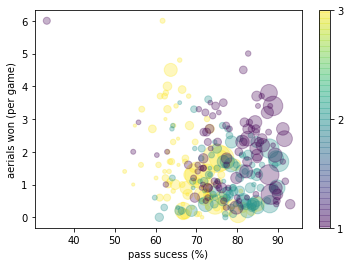

In [73]:
fig, ax = plt.subplots()
im=ax.scatter(bundesliga[:,1], bundesliga[:,2], s = bundesliga[:,0]*10, c = bundesliga[:,3], alpha=0.3, cmap='viridis')
ax.set_xlabel("pass sucess (%)")
ax.set_ylabel("aerials won (per game)")
cbar=fig.colorbar(im)
cbar.set_ticks([1,2,3])

We can also use **subplots** to for multiple scatter plots in one figure:

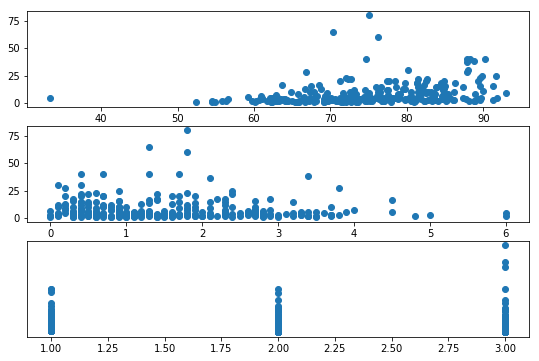

In [74]:
nrows = 3
ncols = 1
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(9, 6))
plt.yticks(())

for i in range(nrows):
    ax[i].scatter(bundesliga[:,i+1],bundesliga[:,0])


This graph is not so informative, since we haven't added which data is contained. Of course, we could look at the original data set and add the information manually, for example that the first graph plots pass success against market value. However, it would be nice if this information were already included when we load the data set. 

That's only one reason why we usually use Pandas when doing data analysis. This will be the topic of the next tutorial.

----------------------------------------------------------------------------------------------------------------------
<a id = "app"></a>

### Exercise 4

The file *Capacities.csv* contains country-level data on electricity generation capacity, and more specifically on capacity of "clean" (i.e. non-carbon emitting) technologies. It consists of three columns: the first columns contains the combined capacity for hydro and nuclear power plants, while the second columns contains the combined capacity for wind and solar installations (all in TW). The third columns contains the overall *capacity factor*, that is, the share of potential electricity that is actually produced. In other words, a capacity factor of 50% would imply that the a plant runs half of the time. In this question, we are interested in how the capacity factor depends on how wind and solar capacity are in the system.

(a) Each column consists of 600 *country-year* observations (30 OECD countries over 20 years). Use Numpy's **loadtxt** function to load the data as a 600-by-3 array. (A side note: there are better ways to work with this kind of data in Python than a Numpy array, as we will see in next lecture).

(b) Visualize the data using a scatter plot, where each axis corresponds to a capacity measure, while the color (or the size) of the markers is determined by the level of the capacity factor.

(c) If you are not interested in absolute capacity levels, an alternative is to plot the capacity factor against the *relative* capacity of wind and solar, i.e. their share in total renewable capacity. Use Matplotlib's **plot** method, but with markers instead of lines. Also, include only those observations that have a wind & solar share of more than 1 percent (Hint: use a logical Nunpy array).

----------------------------------------------------------------------------------------------------------------------
<a id = "app"></a>

## Appendix: Copying Arrays (and Lists)
Just as lists, NumPy arrays are mutable, i.e. can be changed. Note that this brings about the same issue as with lists if two names refer to the same array: then changing one of them will change the other as well. As this topic is quite important when working with lists and arrays, we present some extension to copying of lists here. Generally, copies can be disguingished between *shallow* and *deep* copies. While a *deep* copy also copies objects that are part of the list (e.g. list in list), a shallow copy would point to the same nested list. To understand the difference, several methods for lists are compared here: **list.copy()** (shallow copy), **slicing** (shallow copy), **copy.copy** (shallow) and **copy.deepcopy** from the module copy. If you need a copy and don't care that much about memory, we would suggest to always make deep copies of lists. If you are sure you are using only a flat list, you can also use a method for shallow copies.

In [75]:
# Import the module copy
import copy

# Simple List
a1 = [1, 2, 3, 4]
b1 = a1[:] #shallow copy
c1 = copy.deepcopy(a1) # deep copy
d1 = a1.copy() #shallow copy
e1 = copy.copy(a1) #shallow copy
# We set values of the copies to 0 at different positions to see which of them changes the orginal 
b1[0] = 0
c1[1] = 0
d1[2] = 0
e1[3] = 0
# And print the original list
print(a1)

[1, 2, 3, 4]


In [76]:
# Nested List
a2 = [[1], [2], [3], [4]]
b2 = a2[:] # shallow copy
c2 = copy.deepcopy(a2) # deep copy
d2 = a2.copy() # shallow copy
e2 = copy.copy(a2) # shallow copy
# We set values of the copies to 0 at different positions to see which of them changes the orginal 
b2[0][0] = 0
c2[1][0] = 0
d2[2][0] = 0
e2[3][0] = 0
# And print the original list
print(a2)

[[0], [2], [0], [0]]


In NumPy, you can make a copy of an array by using the **np.copyto** function or the **np.matrix.copy()** method in addition to the functions of the **copy** module. In contrast to lists, slicing by [:] does not lead to a copy of the array. However, to make life a bit easier, all copies of NumPy arrays are deep copies and you don't need to worry about this. As all elements of a NumPy Array consist of identical type, there is hardly any need for shallow copies.

In [77]:
# Simple NP Array
a3 = np.array([1, 2, 3, 4, 5])
b3 = a3[:] # not a copy!
c3 = copy.deepcopy(a3) # deep copy
d3 = a3.copy() # deep copy
e3 = copy.copy(a3) # deep copy
f3 = np.empty_like(a3)
np.copyto(f3,a3) # deep copy
# We set values of the copies to 0 at different positions to see which of them changes the orginal 
b3[0] = 0
c3[1] = 0
d3[2] = 0
e3[3] = 0
f3[4] = 0
# and print the original array
print (a3)

[0 2 3 4 5]


In [78]:
# Nested NP Array
a4 = np.array([[1], [2], [3], [4], [5]])
b4 = a4[:] # not a copy!
c4 = copy.deepcopy(a4) # deep copy
d4 = a4.copy() # deep copy
e4 = copy.copy(a4) # deep copy
f4 = np.empty_like(a4)
np.copyto(f4,a4) # deep copy           
# We set values of the copies to 0 at different positions to see which of them changes the orginal               
b4[0][0] = 0
c4[1][0] = 0
d4[2][0] = 0
e4[3][0] = 0
f4[4] = 0
# and print the original array
print (a4)

[[0]
 [2]
 [3]
 [4]
 [5]]
